## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.datasets import load_iris, load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Load and Prepare Dataset

We'll use the Iris dataset for classification demonstration.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display dataset information
print("Dataset Information:")
print("="*60)
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Class distribution: {np.bincount(y)}")
for i, name in enumerate(iris.target_names):
    print(f"  - {name}: {np.sum(y == i)}")
print("="*60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

Dataset Information:
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]
  - setosa: 50
  - versicolor: 50
  - virginica: 50

Training set size: (105, 4)
Testing set size: (45, 4)
Training class distribution: [35 35 35]
Testing class distribution: [15 15 15]


## Step 3: Train Gaussian Naive Bayes Classifier

Gaussian Naive Bayes is best for continuous data with normal distribution.

In [ ]:
# Create Gaussian Naive Bayes classifier - specifically for continuous features and Numerical data
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

print("Gaussian Naive Bayes Classifier trained successfully!")
print(f"Number of classes: {len(gnb.classes_)}")
print(f"Class labels: {gnb.classes_}")
print(f"Class prior probabilities: {gnb.class_prior_}")
print(f"\nMean of each feature per class:")
for i, class_name in enumerate(iris.target_names):
    print(f"  {class_name}: {gnb.theta_[i]}")

Gaussian Naive Bayes Classifier trained successfully!
Number of classes: 3
Class labels: [0 1 2]
Class prior probabilities: [0.33333333 0.33333333 0.33333333]

Mean of each feature per class:
  setosa: [4.98857143 3.42571429 1.48571429 0.24      ]
  versicolor: [5.94857143 2.73142857 4.23714286 1.30857143]
  virginica: [6.68285714 3.00857143 5.63142857 2.06857143]


## Step 4: Make Predictions and Evaluate

In [4]:
# Make predictions
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Gaussian Naive Bayes Performance:")
print("="*60)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print("="*60)

print("\nClassification Report (Test Set):")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

Gaussian Naive Bayes Performance:
Training Accuracy: 0.9810
Testing Accuracy:  0.9111

Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## Step 5: Predict Probabilities

One advantage of Naive Bayes is that it provides probability estimates.

Probability Predictions (First 10 samples):
Sample   Setosa       Versicolor   Virginica    Predicted    Actual  
------------------------------------------------------------
1        0.0000       0.0000       1.0000       virginica    virginica
2        0.0000       0.9955       0.0045       versicolor   versicolor
3        0.0000       0.8472       0.1528       versicolor   virginica
4        0.0000       0.6680       0.3320       versicolor   versicolor
5        0.0000       0.1036       0.8964       virginica    virginica
6        0.0000       0.0000       1.0000       virginica    virginica
7        0.0000       1.0000       0.0000       versicolor   versicolor
8        0.0000       1.0000       0.0000       versicolor   versicolor
9        1.0000       0.0000       0.0000       setosa       setosa  
10       0.0000       0.0000       1.0000       virginica    virginica


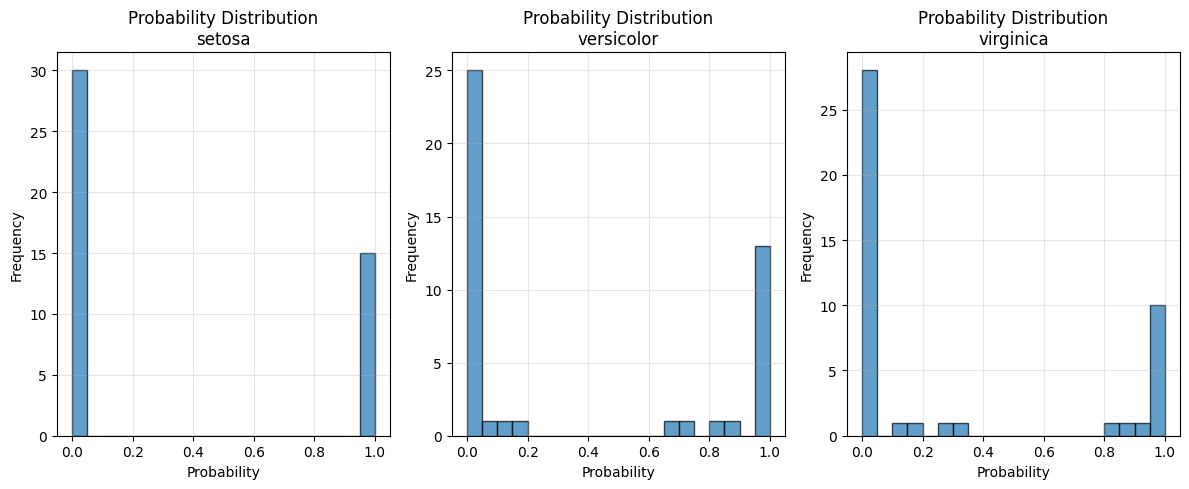

In [5]:
# Get probability predictions
y_test_proba = gnb.predict_proba(X_test)

print("Probability Predictions (First 10 samples):")
print("="*60)
print(f"{'Sample':<8} {'Setosa':<12} {'Versicolor':<12} {'Virginica':<12} {'Predicted':<12} {'Actual':<8}")
print("-"*60)

for i in range(10):
    probs = y_test_proba[i]
    predicted = iris.target_names[y_test_pred[i]]
    actual = iris.target_names[y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]]
    print(f"{i+1:<8} {probs[0]:<12.4f} {probs[1]:<12.4f} {probs[2]:<12.4f} {predicted:<12} {actual:<8}")

# Visualize probability distribution
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(y_test_proba[:, i], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Probability Distribution\n{iris.target_names[i]}')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Confusion Matrix Visualization

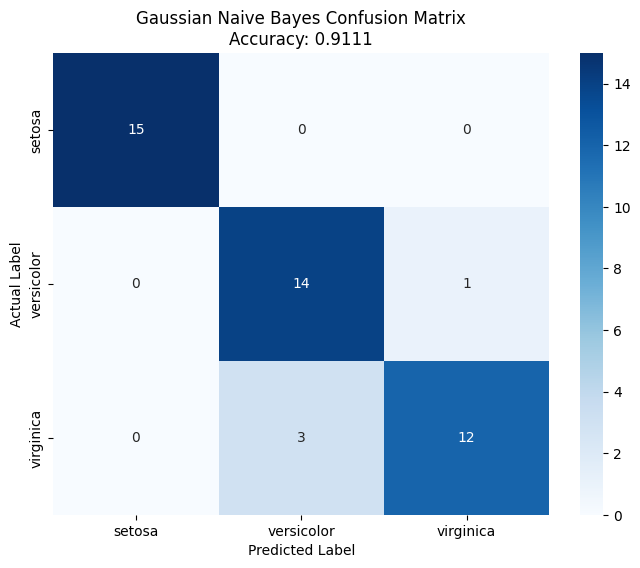

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [6]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title(f'Gaussian Naive Bayes Confusion Matrix\nAccuracy: {test_accuracy:.4f}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix:")
print(cm)

## Step 7: Comparing Different Naive Bayes Types

Let's compare Gaussian, Multinomial, and Bernoulli Naive Bayes.

In [7]:
# For Multinomial and Bernoulli, we need non-negative features
# Let's use Breast Cancer dataset which has all positive features
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

# Compare different Naive Bayes classifiers
nb_classifiers = {
    'Gaussian': GaussianNB(),
    'Multinomial': MultinomialNB(),
    'Bernoulli': BernoulliNB()
}

results = []

print("Comparing Different Naive Bayes Types:")
print("="*60)

for name, clf in nb_classifiers.items():
    try:
        # Train
        clf.fit(X_train_c, y_train_c)
        
        # Predict
        train_acc = clf.score(X_train_c, y_train_c)
        test_acc = clf.score(X_test_c, y_test_c)
        
        # Cross-validation
        cv_scores = cross_val_score(clf, X_train_c, y_train_c, cv=5)
        
        results.append({
            'Type': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std()
        })
        
        print(f"{name} Naive Bayes:")
        print(f"  Train Accuracy: {train_acc:.4f}")
        print(f"  Test Accuracy:  {test_acc:.4f}")
        print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        print("-"*60)
    except Exception as e:
        print(f"{name} Naive Bayes: Error - {e}")
        print("-"*60)

# Create comparison dataframe
df_results = pd.DataFrame(results)
print("\nComparison Summary:")
print(df_results.to_string(index=False))

Comparing Different Naive Bayes Types:
Gaussian Naive Bayes:
  Train Accuracy: 0.9447
  Test Accuracy:  0.9474
  CV Score: 0.9397 (+/- 0.0241)
------------------------------------------------------------
Multinomial Naive Bayes:
  Train Accuracy: 0.8920
  Test Accuracy:  0.9006
  CV Score: 0.8870 (+/- 0.0106)
------------------------------------------------------------
Bernoulli Naive Bayes:
  Train Accuracy: 0.6281
  Test Accuracy:  0.6257
  CV Score: 0.6282 (+/- 0.0039)
------------------------------------------------------------

Comparison Summary:
       Type  Train Accuracy  Test Accuracy  CV Mean   CV Std
   Gaussian        0.944724       0.947368 0.939747 0.024136
Multinomial        0.891960       0.900585 0.886994 0.010617
  Bernoulli        0.628141       0.625731 0.628165 0.003876


## Step 8: Visualize Performance Comparison

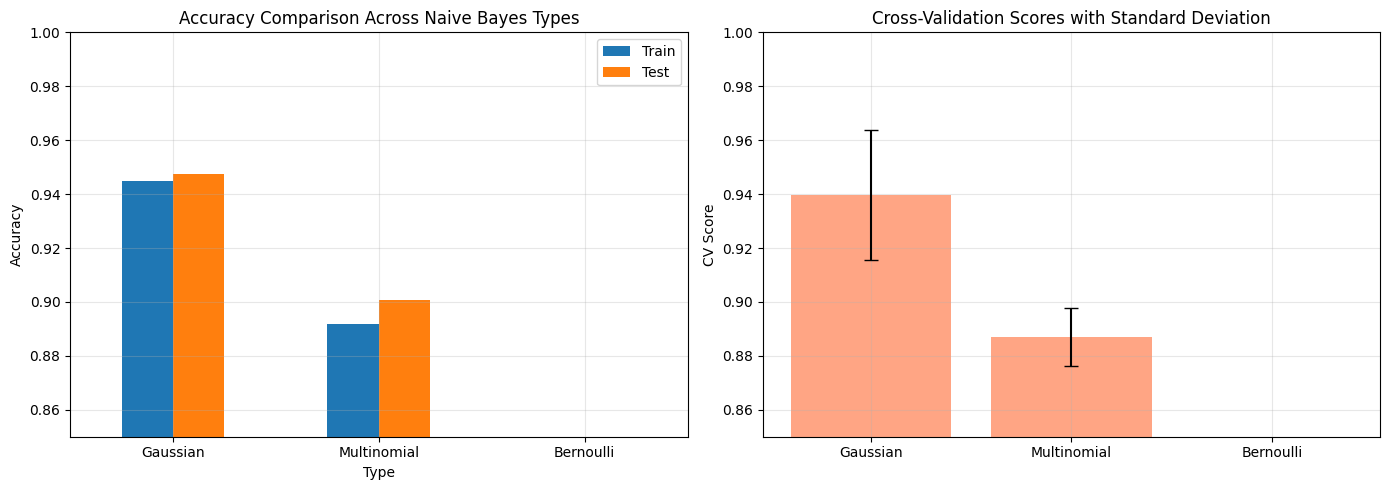

In [8]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
df_results.plot(x='Type', y=['Train Accuracy', 'Test Accuracy'], 
                kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Accuracy Comparison Across Naive Bayes Types')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.85, 1.0])
axes[0].legend(['Train', 'Test'])
axes[0].grid(True, alpha=0.3)

# Cross-validation scores
axes[1].bar(df_results['Type'], df_results['CV Mean'], 
            yerr=df_results['CV Std'], capsize=5, alpha=0.7, color='coral')
axes[1].set_title('Cross-Validation Scores with Standard Deviation')
axes[1].set_ylabel('CV Score')
axes[1].set_ylim([0.85, 1.0])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 9: Effect of Sample Size

Let's see how Naive Bayes performs with different training set sizes.

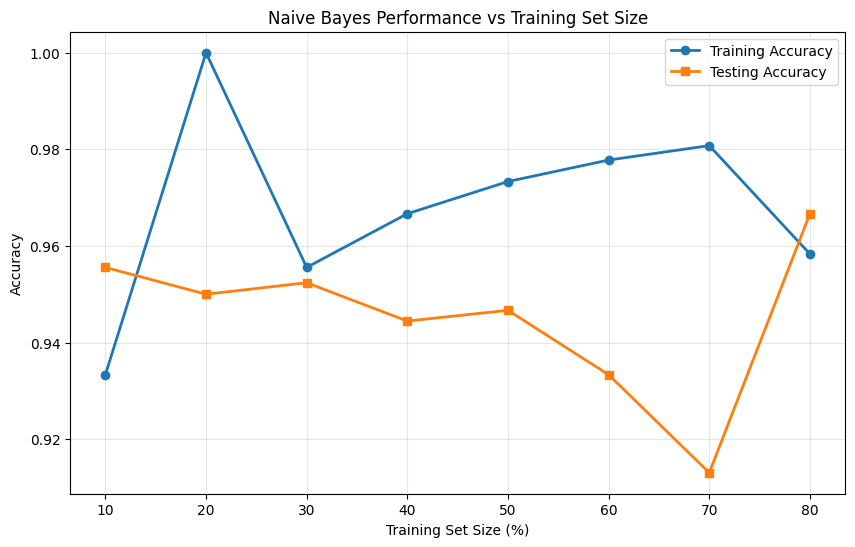

Performance Analysis:
------------------------------------------------------------
Observation: Naive Bayes works well even with small training sets!
With just 10% training data: Test accuracy = 0.9556
With 80% training data: Test accuracy = 0.9667
------------------------------------------------------------


In [9]:
# Test different training sizes
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
train_scores = []
test_scores = []

for size in train_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=(1-size), random_state=42, stratify=y
    )
    
    gnb_temp = GaussianNB()
    gnb_temp.fit(X_tr, y_tr)
    
    train_scores.append(gnb_temp.score(X_tr, y_tr))
    test_scores.append(gnb_temp.score(X_te, y_te))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot([int(s*100) for s in train_sizes], train_scores, 
         marker='o', label='Training Accuracy', linewidth=2)
plt.plot([int(s*100) for s in train_sizes], test_scores, 
         marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Performance vs Training Set Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Performance Analysis:")
print("-"*60)
print("Observation: Naive Bayes works well even with small training sets!")
print(f"With just 10% training data: Test accuracy = {test_scores[0]:.4f}")
print(f"With 80% training data: Test accuracy = {test_scores[-1]:.4f}")
print("-"*60)

## Key Parameters and Best Practices

### Key Parameters in Naive Bayes:

**Gaussian Naive Bayes:**
- **var_smoothing**: Portion of largest variance added to variances for stability (default=1e-9)
  - Prevents zero probability for unseen features
  - Higher values = more smoothing

**Multinomial Naive Bayes:**
- **alpha**: Additive (Laplace/Lidstone) smoothing parameter (default=1.0)
  - alpha=0: No smoothing
  - alpha=1: Laplace smoothing
  - Handles zero probability problem

**Bernoulli Naive Bayes:**
- **alpha**: Smoothing parameter (default=1.0)
- **binarize**: Threshold for binarizing features (default=0.0)
  - None: Assumes features already binary
  - Float: Converts features > threshold to 1, else 0

### Best Practices:

1. **Choose Right Type**:
   - Gaussian: Continuous data, normally distributed
   - Multinomial: Count/frequency data (text classification)
   - Bernoulli: Binary features (document classification)

2. **Handle Zero Probability**: Use smoothing (alpha parameter)

3. **Feature Engineering**: Create independent features when possible

4. **Scaling Not Required**: Unlike SVM, Naive Bayes doesn't require feature scaling

5. **Works with Small Data**: Excellent choice when training data is limited

6. **Fast and Efficient**: Suitable for real-time predictions

### When to Use Naive Bayes:

✅ **Good for:**
- Text classification and NLP tasks
- Spam filtering
- Real-time prediction
- Multi-class problems
- Small training datasets
- High-dimensional data

❌ **Not ideal for:**
- Features with strong correlations
- Regression problems
- When probability estimates need to be precise
- Complex decision boundaries

## Conclusion:

Naive Bayes is a powerful probabilistic classifier that:
- Uses Bayes' Theorem with independence assumption
- Provides fast training and prediction
- Works well with small datasets and high dimensions
- Excels in text classification and NLP applications
- Gives probability estimates along with predictions

**Key Insight**: Despite the "naive" assumption of feature independence (which rarely holds true), Naive Bayes often performs surprisingly well in practice, making it a great baseline algorithm for classification tasks!